# Aztec G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import test_run

sim_df = test_run().set_index('l1_blocks_passed')
sim_df.columns

Index(['index', 'delta_l1_blocks', 'l2_blocks_passed', 'agents',
       'validator_set', 'PROVING_COST_MODIFIER', 'current_epoch', 'last_epoch',
       'last_reward_time_in_l1', 'last_reward',
       'market_price_l1_juice_per_mana', 'market_price_l1_gas',
       'market_price_l1_blobgas', 'oracle_price_juice_per_mana',
       'oracle_price_l1_gas', 'oracle_price_l1_blobgas', 'oracle_proving_cost',
       'congestion_multiplier', 'excess_mana', 'market_price_juice_per_mana',
       'base_fee', 'cumm_empty_blocks', 'cumm_unproven_epochs',
       'cumm_dropped_tx', 'cumm_excl_tx', 'cumm_resolved_epochs',
       'cumm_finalized_epochs', 'cumm_mana_used_on_finalized_blocks',
       'cumm_finalized_blocks', 'simulation', 'subset', 'run', 'timestep',
       'label', 'timestep_in_l1_blocks', 'general', 'fee', 'reward', 'stake',
       'slash', 'behavior'],
      dtype='object')

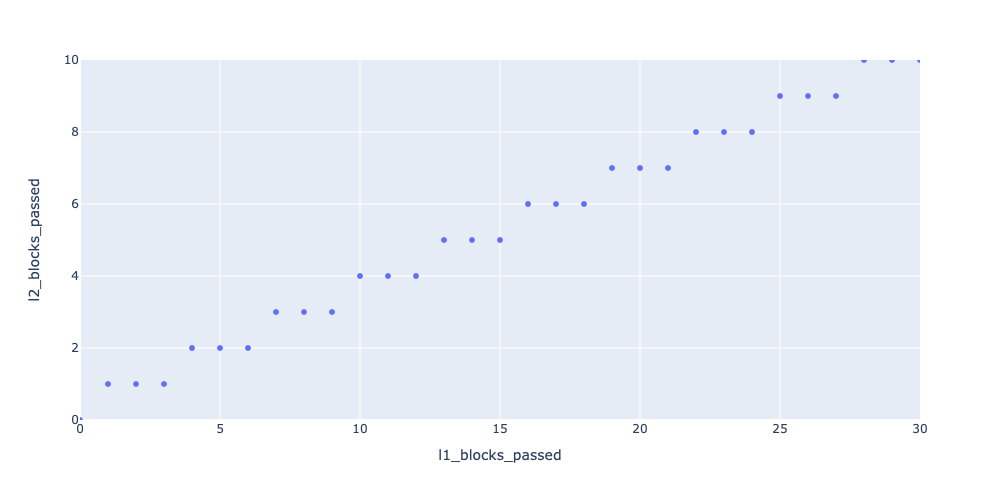

In [3]:
fig = px.scatter(sim_df.reset_index(), 'l1_blocks_passed', 'l2_blocks_passed')
fig.update_layout(yaxis_range=[0, 10], xaxis_range=[0,  10 * 3], width=1000, height=500)
fig.show()

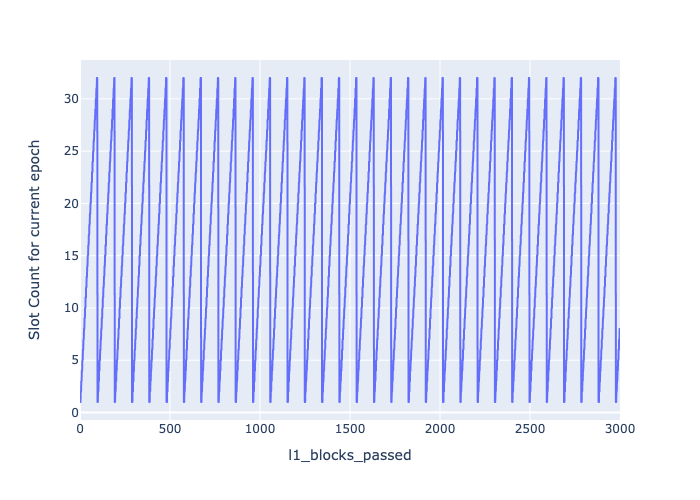

In [4]:
y = sim_df.current_epoch.map(lambda x: len(x.slots))

fig = px.line(sim_df, y=y, labels={"x": 'timestep', 'y': 'Slot Count for current epoch'})
fig.show()

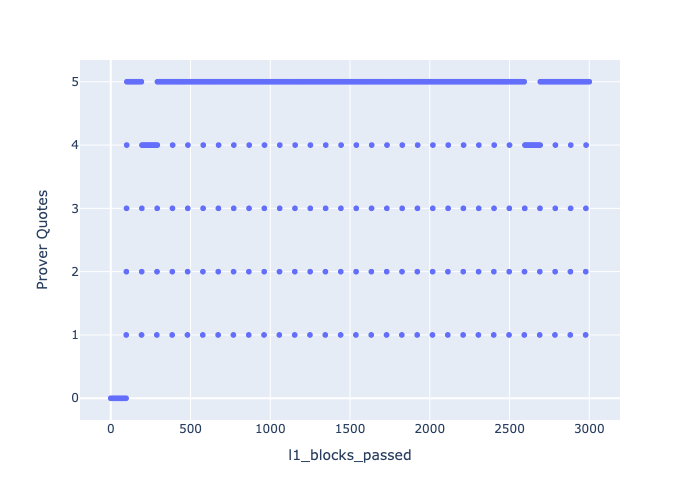

In [5]:
y = sim_df.last_epoch.map(lambda x: len(x.prover_quotes))

fig = px.scatter(sim_df, y=y, labels={"x": 'timestep', 'y': 'Prover Quotes'})
fig.show()

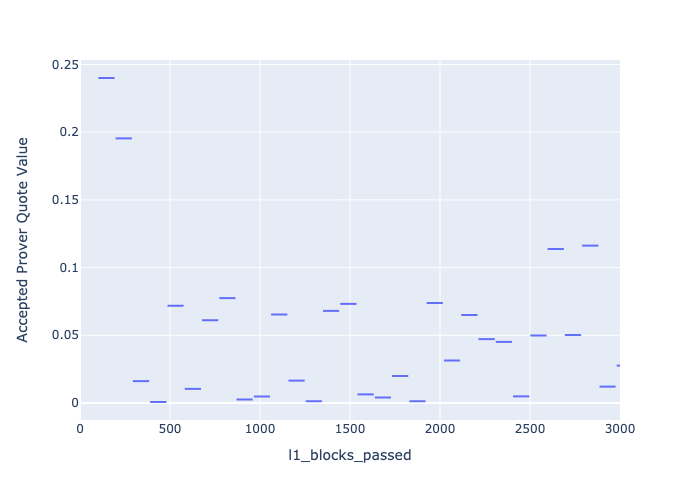

In [6]:
y = sim_df.last_epoch.map(lambda x: x.accepted_prover_quote)

fig = px.line(sim_df, y=y, labels={"x": 'timestep', 'y': 'Accepted Prover Quote Value'})
fig.show()

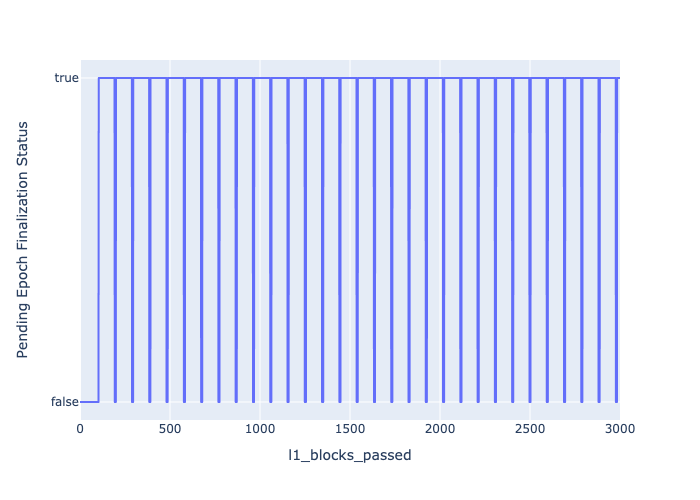

In [7]:
y = sim_df.last_epoch.map(lambda x: x.finalized)

fig = px.line(sim_df, y=y, labels={"x": 'timestep', 'y': 'Pending Epoch Finalization Status'})
fig.show()

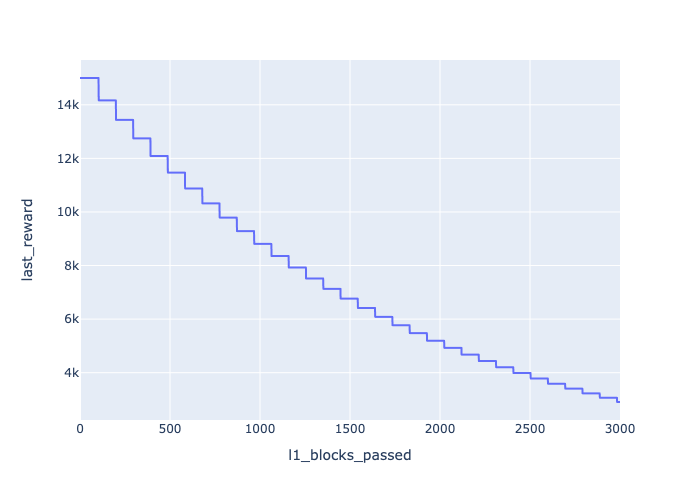

In [8]:
y = sim_df.last_reward

fig = px.line(sim_df, y=y, labels={"x": 'timestep', 'y': 'Last Reward'})
fig.show()

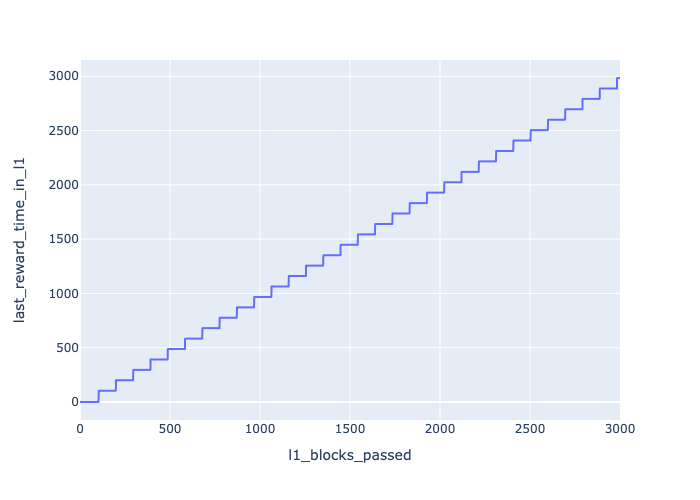

In [9]:
y = sim_df.last_reward_time_in_l1

fig = px.line(sim_df, y=y, labels={"x": 'timestep', 'y': 'Last Reward Time'})
fig.show()

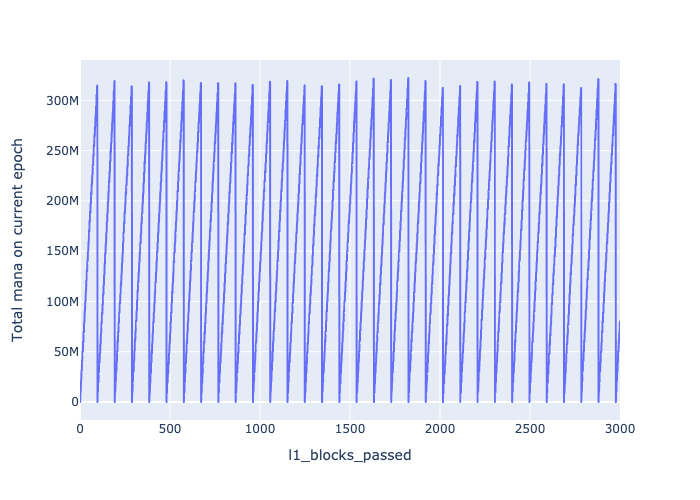

In [10]:
y = sim_df.current_epoch.map(lambda x: sum(s.tx_total_mana for s in x.slots))

fig = px.line(sim_df, y=y, labels={"x": 'timestep', 'y': 'Total mana on current epoch'})
fig.show()

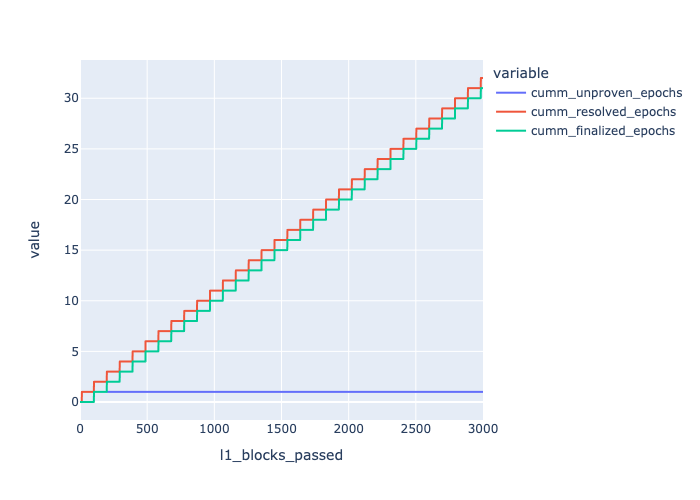

In [11]:
y = ['cumm_unproven_epochs', 'cumm_resolved_epochs', 'cumm_finalized_epochs']

fig = px.line(sim_df, y=y)
fig.show()

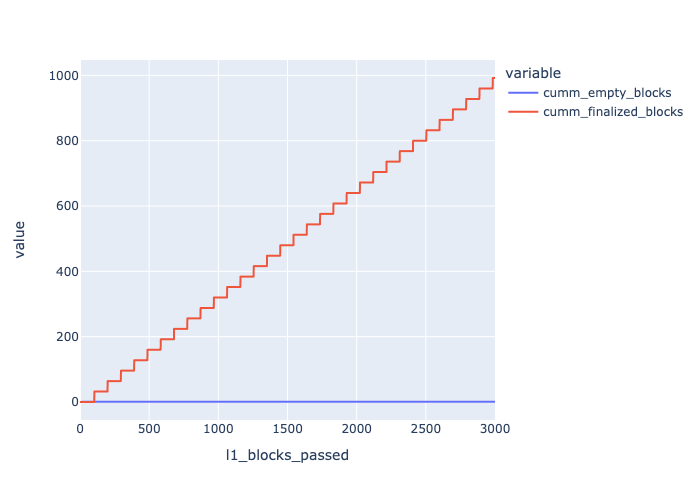

In [12]:
y = ['cumm_empty_blocks', 'cumm_finalized_blocks']

fig = px.line(sim_df, y=y)
fig.show()

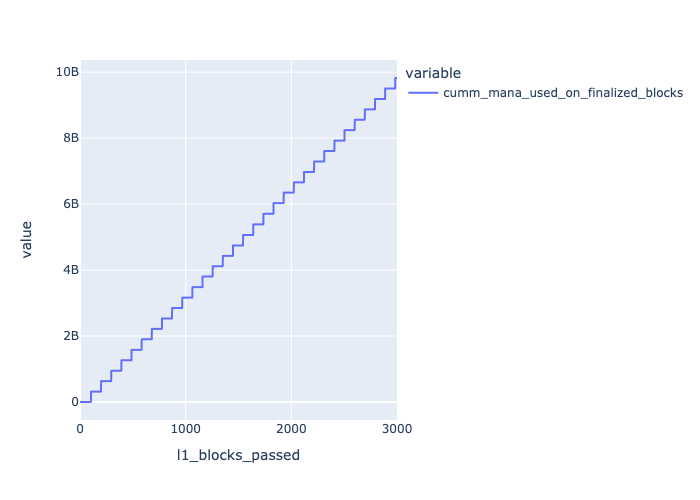

In [13]:
y = ['cumm_mana_used_on_finalized_blocks']

fig = px.line(sim_df, y=y)
fig.show()

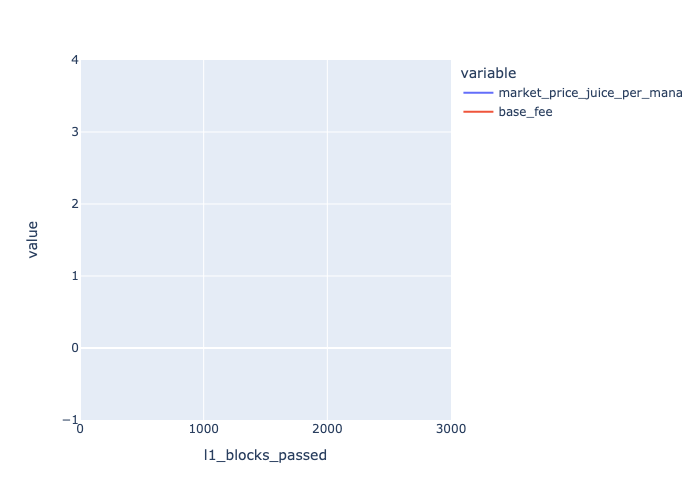

In [14]:
y = ['market_price_juice_per_mana', 'base_fee']

fig = px.line(sim_df, y=y)
fig.show()

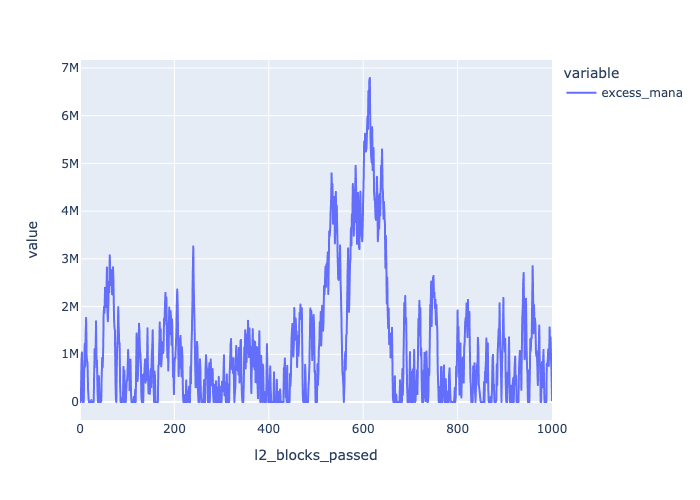

In [15]:
x = 'l2_blocks_passed'
y = ['excess_mana']

fig = px.line(sim_df, x=x, y=y)
fig.show()

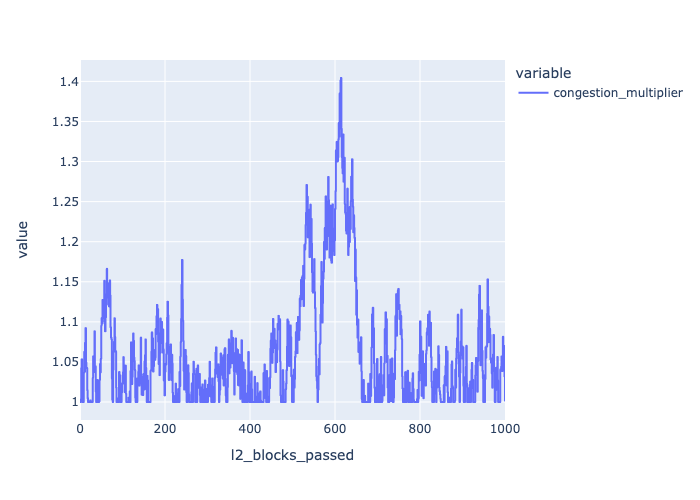

In [16]:
x = 'l2_blocks_passed'
y = ['congestion_multiplier']

fig = px.line(sim_df, x=x, y=y)
fig.show()

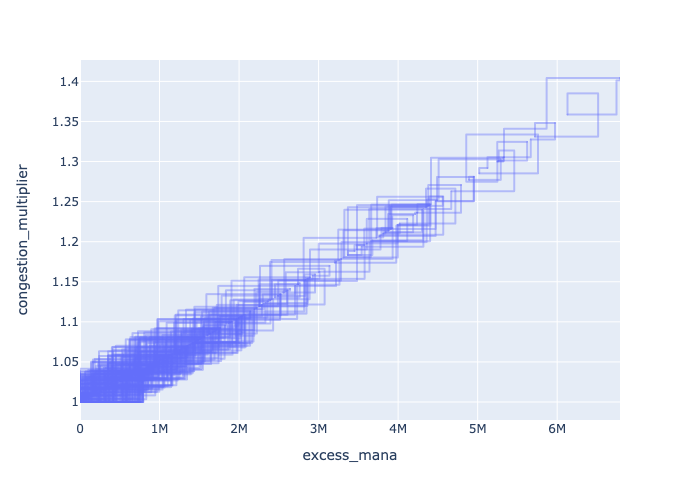

In [33]:

fig = px.line(sim_df, x='excess_mana', y='congestion_multiplier')
fig.update_traces(opacity=.4)
fig.show()